# Neural Networks with PyTorch - Solutions

In [1]:
import torch

### Tensors

PyTorch tensors are multidimensional data containers, conceptually identical to numpy arrays
(in many cases, identical functions exist in both frameworks for the respective data arrays).

Use the [PyTorch Documentation](https://pytorch.org/docs/stable/tensors.html) to initialize tensors:
* 1-D Tensor of size 5 containing the natural numbers 1,2,3,4,5
* 2-D Tensor of size [3,3] containing random float numbers
* 3-D Tensor of size [1, 1, 1] containing data of type unsigned integer (torch.uint8)

In [2]:
# start solution
a = torch.Tensor([1,2,3,4,5])

a = torch.linspace(1, 5, 5, dtype=torch.int32) # alternative

b = torch.randn((3,3))

c = torch.ByteTensor([[[1]]])
# end solution

What happens if you sum (multiply) the previously created tensors of shape (5) and (1,1,1)?
Try it and assign the results to the variable `` tensor_sum`` (``tensor_product``).

In [3]:
# start solution
tensor_sum = a+c
tensor_product = a*c
# end solution

Have a look at these basic [tensor operations](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops).

* Create a tensor of shape (10) by concatenating two versions of the previously created 5-entry tensor. 
* Create a tensor of shape (9) from the previously created random tensor of shape (3, 3).
* Create the transposed version of your random tensor of shape (3, 3).

In [4]:
# start solution
con = torch.concat([a, a], dim=0)

flat = torch.reshape(b, [9])
flat = torch.flatten(b) # alternative

trans = torch.permute(b, (1, 0))
trans = torch.transpose(b, 0, 1) # alternative
# end solution

### Computing a neuron with pyTorch

Performing the computations for a single Neuron with pyTorch and tensors is easy!
The required weighted sum can be computed by using built-in vector products,
and different activation functions are also readily available.

In the following, define a tensor ``weights`` of shape (5) which contains the weights of the neuron to be computed.
Further, instantiate the class [``torch.nn.Sigmoid()``](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#sigmoid) in a variable ``activation``,
which will be used to compute the neuron's activation value.

Create a tensor variable ``input = torch.ones((5,1))`` incorporating the input values to the neuron.

Then, compute the neuron's output according to the lecture. 

In [5]:
weights = torch.randn((5))
activation = torch.nn.Sigmoid()

input = torch.ones((5))

# start solution
# Compute Neuron output (weighted sum and sigmoid activation)
output = activation(torch.dot(weights, input))
# end solution

print(output)

tensor(0.1763)


### Neural Network Components

However, computations like these do not need to be implemented manually in most cases.
PyTorch already contains classes and functions for most basic neural network layer types and components.

In the following, we will implement a simple neural network.
The network operates on input data of size 13.
There is one hidden layer within the network consisting of 20 neurons (fully-connected).
The network's output layer contains 3 neurons.

Use the class [``torch.nn.Linear``](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to create two fully-connected neural network layers.
The class' constructor takes the number of input units and the number of output units as arguments.
Further, the argument ``bias=True`` activates the bias for all neurons in the layer.
The layer's weights are randomly initialized (using uniform Xavier initialization).

For each of the layers, create an activation function.
The first layer uses a Sigmoid activation function, 
for the second layer, employ an instance of the class [``torch.nn.Softmax``](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#softmax) as activation function.

Last, define a function ``neural_net(input_tensor)`` which computes the neural network's output values for the given input tensor of shape (*, 13).
(Note, that 2-dimensional input tensors are required as pyTorch's neural networks are designed to compute outputs for multiple samples (a whole batch) at once.) 
Using the function, compute the neural network's output for the input tensor ``input = torch.ones(1,3)``.

In [6]:
# Initialize fully-connected layers and activation functions according to specifications above (dimensions, function types, etc.)
# start solution
linear_layer_1 = torch.nn.Linear(13, 20, bias=True)
activation_1 = torch.nn.Sigmoid()
linear_layer_2 = torch.nn.Linear(20, 3, bias=True)
activation_2 = torch.nn.Softmax(1)
# end solution

def neural_net(input_tensor):
    # Compute neural network output (pass input through both layers and apply activation functions as defined above)
    # start solution
    x = linear_layer_1(input_tensor)
    x = activation_1(x)
    x = linear_layer_2(x)
    x = activation_2(x)
    return x
    # end solution

input = torch.ones(1,13)
neural_net(input)

tensor([[0.3694, 0.2386, 0.3921]], grad_fn=<SoftmaxBackward0>)

### Simple Neural Network with pyTorch

However, to be able to fully utilize the previously defined neural network inside pyTorch,
we need to instantiate it inside a class derived from the base class ``torch.nn.Module``.

Such a custom model class must implement the function ``forward(self, x)`` which computes the model's forward pass for an input tensor x.

In the following, implement the simple neural network described above inside the class ``MyNeuralNetwork``.

In [7]:
class MyNeuralNetwork(torch.nn.Module):
    
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        # start solution
        self.linear_layer_1 = torch.nn.Linear(5, 60, bias=True)
        torch.nn.init.xavier_uniform_(self.linear_layer_1.weight)
        self.activation_1 = torch.nn.ReLU()
        self.linear_layer_2 = torch.nn.Linear(60, 3, bias=True)
        torch.nn.init.xavier_uniform_(self.linear_layer_2.weight)
        self.activation_2 = torch.nn.Softmax(1)
        # end solution
        
    def forward(self, x):
        # start solution
        x = self.linear_layer_1(x)
        x = self.activation_1(x)
        x = self.linear_layer_2(x)
        x = self.activation_2(x)
        return x
        # end solution

Now, we want to test the forward pass of the implemented neural network with a dummy input tensor.

Generally, inputs are processed batch-wise by pyTorch Modules. Thus, the network expects an 2-dimensional tensor as input: the first dimensions corresponds to the batch size, and the second dimension contains the features for a single sample.

Instantiate a tensor containing two samples (batch size 2) with all feature values equal to ``1``.
Pass the tensor with the two samples through your neural network.

What shape has the output tensor? How can the dimensions and entries be interpreted?

In [8]:
neural_net_instance = MyNeuralNetwork()
# start solution
input = torch.ones(2, 5)
neural_net_instance(input)
# end solution

tensor([[0.2958, 0.2706, 0.4336],
        [0.2958, 0.2706, 0.4336]], grad_fn=<SoftmaxBackward0>)

### Interpreting Output Shapes

When passing a batch of input samples through the neural network, the output tensor has the shape `(batch_size, num_classes)`. 

- In this example, the input tensor has shape `(2, 5)`, meaning there are 2 samples, each with 5 features.
- The output tensor will have shape `(2, 3)`, corresponding to 2 samples and 3 output values (one for each class).

Each row in the output tensor contains the predicted class probabilities (after the softmax activation) for a single input sample. The highest value in each row indicates the model's predicted class for that sample.

**Example:**
If the output is:

```python
tensor([[0.1, 0.7, 0.2], [0.3, 0.3, 0.4]])
```

- The first sample is most likely class 1 (0-based indexing).
- The second sample is most likely class 2.

This shape convention is standard for classification tasks in PyTorch.

### Model Parameter Counting

The pyTorch class ``Module`` provides a number of very useful functionalities.

For instance, if set up correctly, the trainable network parameters of the model can be accessed by the functions ``parameters()`` or ``named_parameters()``.
In the following, the latter function is used to access all parameters names and values.
Complete the code to compute and output the number of parameters for each named parameter, as well as the total number of parameters in your model.

In [9]:
sum_of_parameters = 0
for par_name, par_values in neural_net_instance.named_parameters():
    print("Named parameter: {}".format(par_name))
    # start solution
    number_of_parameters = par_values.numel()
    print(" Number of parameters: {}".format(number_of_parameters))
    sum_of_parameters += number_of_parameters
    # end solution
print("Total number of parameters: {}".format(sum_of_parameters))

Named parameter: linear_layer_1.weight
 Number of parameters: 300
Named parameter: linear_layer_1.bias
 Number of parameters: 60
Named parameter: linear_layer_2.weight
 Number of parameters: 180
Named parameter: linear_layer_2.bias
 Number of parameters: 3
Total number of parameters: 543


### Loss functions

Like many important machine learning essentials, standard loss functions are already implemented in PyTorch.

In the lecture, we have seen the frequently used Cross-Entropy-Loss. This loss is incorporated in the PyTorch-class ``torch.nn.CrossEntropyLoss``.
The class can be initialized without arguments.
To compute the loss, the class instance can be called taking the probabilities for each class as first, and the true class labels (data type ``long``) as second argument.

Using the PyTorch-implementation, compute the cross entropy loss for a single sample in which class probabilites of ``[0.1, 0.8, 0.1]`` were predicted and the true class label is ``1``.

In [10]:
# start solution
loss = torch.nn.CrossEntropyLoss()
predicted_probs = torch.Tensor([[0.2, 0.8, 0.2]])
true_label = torch.Tensor([1]).long()
loss_value = loss(predicted_probs, true_label)
loss_value
# end solution

tensor(0.7408)

Which inputs are required to create an extremely low (high) loss value?

Try to create and use inputs which achieve a loss value equal or close to ``0``.

In [11]:
# start solution
predictions = torch.Tensor([[1e5, 0.0],
                            [1e5, 0.0]])
labels = torch.Tensor([0, 0]).long()
loss_value = loss(predictions, labels)
loss_value
# end solution

tensor(0.)

### Optimizers

Similarly, pyTorch also contains implementations of optimization algorithms like gradient descent.
A broad variety of different [optimizers](https://pytorch.org/docs/stable/optim.html) are implemented.
Nearly all of these optimizers are improved or more sophisticated versions of vanilla gradient descent, which we discussed in the lecture.
We will use stochastic gradient descent, which is implemented in the class ``torch.optim.SGD``. 

Initialize a SGD optimizer, the constructor takes to optimizable parameters as argument (use the function ``parameter()`` of the above implemented model). Further, the named argument ``lr`` can be used to set the (initial) learning rate. Set that value to ``0.01``.

In [12]:
# start solution
optimizer = torch.optim.SGD(neural_net_instance.parameters(), lr=0.1)
# end solution

Next, we will create an extremely small dummy dataset on which our previously defined model should be able to overfit.

In [13]:
n_samples = 12
dummy_training_data_x = torch.rand([n_samples, 5])
dummy_training_data_y = torch.Tensor([i%3 for i in range(n_samples)]).long()

First, we want to implement a function ``compute_accuracy()`` which computes the model's accuracy.

To compute the accuracy, complete the following steps:

* Run data through model to get class probabilities
* Find class prediction by picking highest probability for each sample
* Compute relative number of samples in which class predictions coincides with annotated class
* Return the computed accuracy

In [14]:
def compute_accuracy(model, data_x, data_y):
    # start solution
    probs = model(data_x)
    predictions = probs.argmax(1)
    accuracy = (predictions == data_y).float().mean()
    return accuracy.detach().numpy()
    # end solution

Before we start to train the model, i.e. to optimize the model parameters, we want to compute the model's accuracy in an untrained state (random weights).

What accuracy value would you expect?

Use the function ``compute_accuracy`` to compute the model accuracy for the dummy training data and print it to the console.

In [15]:
# start solution
# expected accuracy: 0.33 equivalent to guessing one of three possible classes.
acc = compute_accuracy(neural_net_instance, dummy_training_data_x, dummy_training_data_y)
print("Model accuracy before training: {}".format(acc))
# end solution

Model accuracy before training: 0.3333333432674408


To perform a single training step in pyTorch, the following steps need to be performed:
* Reset all gradients by calling the optimizer's method ``zero_grad()``
* Pass training samples through model (call ``Module`` instance)
* Loss computation
* Compute backward pass using the optimizer's method ``backward()``
* Update model parameters using the optimizer's method ``step()``

The following function ``training_step`` performs all of the above to perform one gradient descent step and returns the computed loss value.

In [16]:
def training_step(model: torch.nn.Module, loss: torch.nn.CrossEntropyLoss, optimizer: torch.optim.Optimizer, data_x: torch.Tensor, data_y: torch.Tensor):
    optimizer.zero_grad()
    prediction = model(data_x)
    opt_target = loss(prediction, data_y)
    opt_target.backward()
    optimizer.step()
    return opt_target.detach().numpy()

In the following, use all of the above variables and instances (model, loss, optimizer, dummy data, training function) to train your neural network on the dummy data.

In each training epoch, iterate over the shuffled training samples. 
For each training sample, perform one stochastic gradient descent step.
Sum of the losses for each sample to compute the epoch's overall loss and write it to ``epoch_losses``.
When these steps are performed for all data samples, compute the model's accuracy after the training epoch.

If the accuracy reaches 1.0 before all epochs are performed, training may be stopped.

In [17]:
import numpy as np
indizes = np.arange(dummy_training_data_x.shape[0])
epoch_losses = []

for epoch in range(1000):
    np.random.shuffle(indizes)
    # start solution
    loss_sum = 0
    for i in indizes:
        sample_loss_value = training_step(neural_net_instance, loss, optimizer, dummy_training_data_x[i:i+1], dummy_training_data_y[i:i+1])
        loss_sum += sample_loss_value
    loss_sum /= dummy_training_data_x.shape[0]
    epoch_losses.append(loss_sum)
    acc = compute_accuracy(neural_net_instance, dummy_training_data_x, dummy_training_data_y)
    # end solution
    if acc == 1.0:
        break

print("Finished training after {} epochs. Model accuracy: {}".format(epoch+1, acc))

Finished training after 1000 epochs. Model accuracy: 0.9166666865348816


Use the following lines of code to plot your training progress (the evolution of the loss during training).

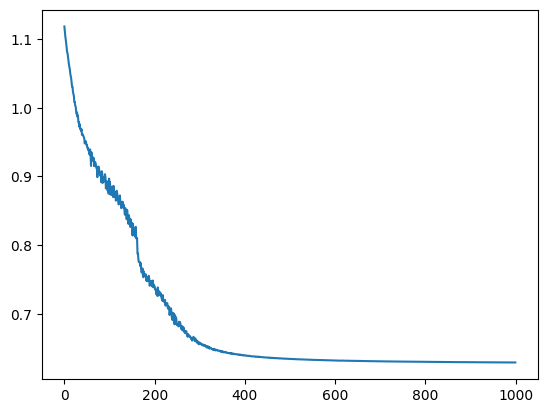

In [18]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(epoch_losses)
plt.show()